<a href="https://colab.research.google.com/github/shakurovas/pt-ms_gb/blob/master/coursework_pt%26msipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Курсовой проект по курсу "Теория вероятностей и математическая статистика" на Geekbrains**

Я выбрала данные про суперсплавы. Данные взяты с Kaggle.com: https://www.kaggle.com/datasets/edgedislocation/superalloys?select=selestedsuperalloy.csv

Хочу узнать, как влияют неметаллы на эти сплавы металлов и есть ли значимые различия в их содержании в представленных типах сверхсплавов 

*Задачи, которые собираюсь выполнить в процессе этой работы:*


*   Провести разведочный анализ данных
*   Провести дисперсионный анализ данных
*   Выдвинуть гипотезы по изучаемому датасету и принять/опровергнуть их
*   Создать модель, которая бы предсказывала класс сплава (то есть, по сути, где, в каких условиях его можно применять) по содержанию веществ, и протестировать её





Для начала импортируем все нужные нам библиотеки:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Прочитаем данные и выведем их в виде таблицы:
  
  (**P.S.** Файл сначала нужно подгрузить в папку sample_data раздела файлы!)



In [2]:
df = pd.read_csv('/content/sample_data/selestedsuperalloy.csv')
df

,Alloy(wt%),type,Cr,Co,Mo,W,Ta,Nb,Al,Ti,Fe,C,B,Zr,Re,Hf,Ru
0,718Plus,wrought,19.0,9.0,2.80,1.1,0.0,5.6,1.45,0.75,9.0,0.025,0.0055,0.00,0.0,0.00,0
1,CMSX2,SX,8.0,4.6,0.60,7.9,5.8,0.0,5.60,0.90,0.0,0.000,0.0000,0.00,0.0,0.00,0
2,CMSX4,SX,5.7,11.0,0.42,5.2,5.6,0.0,5.20,0.74,0.0,0.000,0.0000,0.00,3.0,0.10,0
3,CMSX6,SX,9.8,5.0,3.00,0.0,2.1,0.0,4.80,4.70,0.0,0.000,0.0000,0.00,0.0,0.00,0
4,CMSX10,SX,2.0,3.0,0.40,5.0,8.0,0.1,5.70,0.20,0.0,0.000,0.0000,0.00,6.0,0.03,0
5,FT750DC,wrought,20.0,0.0,0.00,3.5,0.0,0.0,2.30,2.10,5.0,0.070,0.0050,0.00,0.0,0.00,0
6,Hastelloy X,wrought,22.0,1.5,9.00,6.0,0.0,0.0,0.00,0.00,18.5,0.100,0.0000,0.00,0.0,0.00,0
7,Hastelloy S,wrought,15.5,0.0,14.50,0.0,0.0,0.0,0.20,0.00,1.0,0.020,0.0090,0.00,0.0,0.00,0
8,Inconel 600,wrought,15.8,0.0,0.00,0.0,0.0,0.0,0.00,0.00,7.2,0.040,0.0000,0.00,0.0,0.00,0
9,Inconel 718,wrought,18.6,0.0,3.10,0.0,0.0,5.0,0.40,0.90,18.5,0.040,0.0000,0.00,0.0,0.00,0


Столбцы представляют собой (по порядку): название сплава, тип (будет описан чуть дальше более подробно), массовое содержание в процентах хрома, кобальта, молибдена, вольфрама, тантала, ниобия, алюминия, титана, железа, углерода, бора, циркония, рения, гафния, рутения

# Подготовительный этап работы с данными

Поскольку название сплава нам мало что даёт, считаю, что имеет смысл убрать этот столбец вообще:

In [3]:
df = df.drop(labels='Alloy(wt%)', axis=1)
df

,type,Cr,Co,Mo,W,Ta,Nb,Al,Ti,Fe,C,B,Zr,Re,Hf,Ru
0,wrought,19.0,9.0,2.80,1.1,0.0,5.6,1.45,0.75,9.0,0.025,0.0055,0.00,0.0,0.00,0
1,SX,8.0,4.6,0.60,7.9,5.8,0.0,5.60,0.90,0.0,0.000,0.0000,0.00,0.0,0.00,0
2,SX,5.7,11.0,0.42,5.2,5.6,0.0,5.20,0.74,0.0,0.000,0.0000,0.00,3.0,0.10,0
3,SX,9.8,5.0,3.00,0.0,2.1,0.0,4.80,4.70,0.0,0.000,0.0000,0.00,0.0,0.00,0
4,SX,2.0,3.0,0.40,5.0,8.0,0.1,5.70,0.20,0.0,0.000,0.0000,0.00,6.0,0.03,0
5,wrought,20.0,0.0,0.00,3.5,0.0,0.0,2.30,2.10,5.0,0.070,0.0050,0.00,0.0,0.00,0
6,wrought,22.0,1.5,9.00,6.0,0.0,0.0,0.00,0.00,18.5,0.100,0.0000,0.00,0.0,0.00,0
7,wrought,15.5,0.0,14.50,0.0,0.0,0.0,0.20,0.00,1.0,0.020,0.0090,0.00,0.0,0.00,0
8,wrought,15.8,0.0,0.00,0.0,0.0,0.0,0.00,0.00,7.2,0.040,0.0000,0.00,0.0,0.00,0
9,wrought,18.6,0.0,3.10,0.0,0.0,5.0,0.40,0.90,18.5,0.040,0.0000,0.00,0.0,0.00,0


### Разберёмся с типами сплавов:

Кратко опишу типы сверхсплавов, о которых пойдёт речь:

In [4]:
df.type.unique()

array(['wrought', 'SX', 'Deposited', 'MA/ODS', 'cast', 'PM'], dtype=object)

*   **wrought** - ковкий, деформируемый сплав (поддающийся обработке давлением). Ковкость обусловлена металлической связью, при которой атомы металла могут смещаться из своих положений в кристаллической решетке, преодолевая меньшее сопротивление. Необходимые свойства: должен хорошо и просто деформироваться 
(пластичность), прочность
*   **SX (single crystal alloy)** - монокристаллический сплав. Такие сплавы обеспечивают жаропрочность изготавливаемых из них изделий. Необходимые свойства: жаропрочность, высокая криогенная стойкость, не подлежат усталостному разрушению
*   **Deposited** - осаждённый сплав. Свойства: прочность, коррозионная стойкость
*   **MA/ODS (mechanically alloyed-oxide dispersion strengthened steel)** - сплав, упрочненный оксидной дисперсией, состоит из металлической матрицы с мелкими частицами оксида, диспергированными внутри нее. Используется для создания высокотемпературных элементов. Необходимые свойства: устойчивость к суровым погодным условиям тропосферы, жаропрочность
*   **cast** - литейный сплав. Отличается от ковкого тем, что расплавляется в печи, выливается в форму и оставляется для охлаждения, а кованый сплав обрабатывается в твердой форме (штамповка, гибка, прокатка, экструзия и т.д.), что приводит к абсолютно разным свойствам. Нужные свойства: жидкотекучесть, усадка
*   **PM (powder metallurgy)** - металлический сплав в виде порошка. Применяется как экономически выгодная замена механической обработке при массовом производстве. Технология позволяет получить высокоточные изделия. Также применяется для достижения особых свойств или заданных характеристик, которые невозможно получить каким-либо другим методом. Необходимые свойства: высокая износостойкость, плотность *или* пористость

Закодируем цифрами названия типов сплавов:

In [5]:
df["type"] = df["type"].astype('category')

In [6]:
df["type"] = df["type"].cat.codes
df

,type,Cr,Co,Mo,W,Ta,Nb,Al,Ti,Fe,C,B,Zr,Re,Hf,Ru
0,5,19.0,9.0,2.80,1.1,0.0,5.6,1.45,0.75,9.0,0.025,0.0055,0.00,0.0,0.00,0
1,3,8.0,4.6,0.60,7.9,5.8,0.0,5.60,0.90,0.0,0.000,0.0000,0.00,0.0,0.00,0
2,3,5.7,11.0,0.42,5.2,5.6,0.0,5.20,0.74,0.0,0.000,0.0000,0.00,3.0,0.10,0
3,3,9.8,5.0,3.00,0.0,2.1,0.0,4.80,4.70,0.0,0.000,0.0000,0.00,0.0,0.00,0
4,3,2.0,3.0,0.40,5.0,8.0,0.1,5.70,0.20,0.0,0.000,0.0000,0.00,6.0,0.03,0
5,5,20.0,0.0,0.00,3.5,0.0,0.0,2.30,2.10,5.0,0.070,0.0050,0.00,0.0,0.00,0
6,5,22.0,1.5,9.00,6.0,0.0,0.0,0.00,0.00,18.5,0.100,0.0000,0.00,0.0,0.00,0
7,5,15.5,0.0,14.50,0.0,0.0,0.0,0.20,0.00,1.0,0.020,0.0090,0.00,0.0,0.00,0
8,5,15.8,0.0,0.00,0.0,0.0,0.0,0.00,0.00,7.2,0.040,0.0000,0.00,0.0,0.00,0
9,5,18.6,0.0,3.10,0.0,0.0,5.0,0.40,0.90,18.5,0.040,0.0000,0.00,0.0,0.00,0


  **0** - это тип сплава **Deposited**

 **1** - **MA/ODS**

 **2** - **PM**

  **3** - **SX**

  **4** - **cast**

  **5** - **wrought**

Добавим столбцы содержания указанных металлов и неметаллов в сумме в каждом сплаве (считаем углерод и бор неметаллами, все остальные - металлами) - потому что гипотезы, которые будут дальше высказываться, нуждаются в таком шаге:

In [7]:
df['metal'] = df[['Cr','Co','Mo','W', 'Ta', 'Nb', 'Al', 'Ti', 'Fe', 'Zr', 'Re', 'Hf', 'Ru']].sum(axis=1)
df['nonmetal'] = df[['C', 'B']].sum(axis=1)
print(df)

    type    Cr    Co     Mo     W   Ta   Nb    Al    Ti    Fe      C       B  \
0      5  19.0   9.0   2.80   1.1  0.0  5.6  1.45  0.75   9.0  0.025  0.0055   
1      3   8.0   4.6   0.60   7.9  5.8  0.0  5.60  0.90   0.0  0.000  0.0000   
2      3   5.7  11.0   0.42   5.2  5.6  0.0  5.20  0.74   0.0  0.000  0.0000   
3      3   9.8   5.0   3.00   0.0  2.1  0.0  4.80  4.70   0.0  0.000  0.0000   
4      3   2.0   3.0   0.40   5.0  8.0  0.1  5.70  0.20   0.0  0.000  0.0000   
5      5  20.0   0.0   0.00   3.5  0.0  0.0  2.30  2.10   5.0  0.070  0.0050   
6      5  22.0   1.5   9.00   6.0  0.0  0.0  0.00  0.00  18.5  0.100  0.0000   
7      5  15.5   0.0  14.50   0.0  0.0  0.0  0.20  0.00   1.0  0.020  0.0090   
8      5  15.8   0.0   0.00   0.0  0.0  0.0  0.00  0.00   7.2  0.040  0.0000   
9      5  18.6   0.0   3.10   0.0  0.0  5.0  0.40  0.90  18.5  0.040  0.0000   
10     0  22.0   0.1   9.00   0.0  0.0  3.5  0.10  0.20   3.0  0.010  0.0000   
11     1  30.0   0.0   0.00   0.5  0.0  

Теперь количество данных у нас следующее: (строк, столбцов)

In [8]:
df.shape

(34, 18)

С данными у нас всё хорошо, пустот (незаполненных ячеек) в них нет, все данные числового типа (кроме type - это категориальный признак), всё, что надо, исправили и дописали

  Значит, можем переходить к визуализации

# Посмотрим, что из себя представляют наши данные с помощью визуализации

1) Для начала посмотрим, сколько у нас экземпляров разных типов:

In [10]:
df['type'].value_counts()

3    15
5    12
1     4
0     1
4     1
2     1
Name: type, dtype: int64

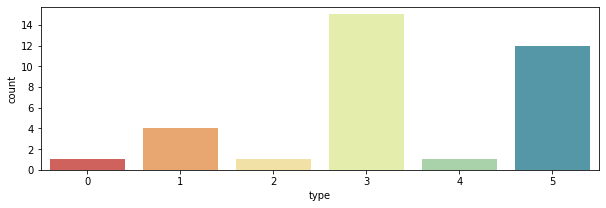

In [11]:
plt.figure(figsize=(10, 3))
sb.countplot(x = "type", data=df, palette="Spectral")
plt.show()

  По одному - для типов 0 (**Deposited**), 2 (**PM**), 4 (**cast**)

  Четыре - для типа 1 (**MA/ODS**)

  Двенадцать экземпляров для типа 5 (**wrought**)

  И аж пятнадцать - для типа 3 (**SX**)

2) Далее, как расположены данные относительно количества металлов и неметаллов в них:

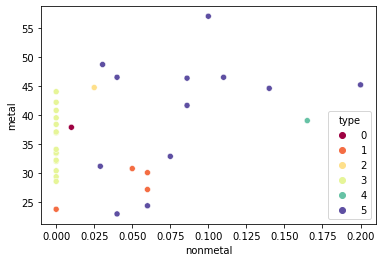

In [12]:
sb.scatterplot(x = 'nonmetal', y = 'metal', data = df, hue = 'type', palette ='Spectral')

Что можем сказать по этому графику?


*   Экземпляры типа 3 (SX) не содержат в себе неметаллических веществ из участвующих в анализе (углерода, бора)
*   Из всех представленных типов самый большой разброс содержания как неметаллических, так и металлических веществ наблюдается у группы типа 5 (wrought)
*   И в ковких, и в литейных сплавах достаточно велико по сравнению с другими наличие неметаллических веществ







# Выдвигаем гипотезу

  **Н0:** Содержание неметаллов незначительно (статистически не значимо) для различий между классами

  **Н1:** Различное содержание неметаллов является значимым и играет роль в различении типов классов

  **p-value** = 0.05

# Проверяем гипотезу

In [17]:
type_0_values = df[df['type'] == 0].values.tolist()
type_1_values = df[df['type'] == 1].values.tolist()
type_2_values = df[df['type'] == 2].values.tolist()
type_3_values = df[df['type'] == 3].values.tolist()
type_4_values = df[df['type'] == 4].values.tolist()
type_5_values = df[df['type'] == 5].values.tolist()
print(type_0_values)

[[0.0, 22.0, 0.1, 9.0, 0.0, 0.0, 3.5, 0.1, 0.2, 3.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 37.900000000000006, 0.01]]


In [18]:
stats.f_oneway(type_0_values, type_1_values, type_2_values, type_3_values, type_4_values, type_5_values)

F_onewayResult(statistic=array([-3.44951723e+15,  2.93700612e+01,  2.01899075e+00,  2.85232139e+00,
        7.36881598e+00,  1.83891509e+01,  1.88454140e+00,  3.77223192e+00,
        1.19714398e+00,  2.12469915e+00,  1.19053786e+01,  1.14995149e+00,
        4.32440551e+00,  5.38191420e+00,  2.83806825e+00,  8.48654038e-01,
        2.12043485e+00,  1.16014764e+01]), pvalue=array([           nan, 2.56194111e-10, 1.06639448e-01, 3.32973763e-02,
       1.61964449e-04, 4.42095537e-08, 1.28970253e-01, 9.76549708e-03,
       3.36013765e-01, 9.18456748e-02, 3.09354640e-06, 3.57970337e-01,
       4.84787291e-03, 1.36751302e-03, 3.39548974e-02, 5.27193262e-01,
       9.24002441e-02, 3.90864935e-06]))

17-ый элемент в каждом из этих списков отвечает за содержание неметаллических веществ. p-value = 3.90864935e-06, что значительно меньше 0.05, поэтому нулевую гипотезу мы отвергаем и говорим, что, действительно, *различное содержание неметаллов в разных классах является значимым и играет роль в их различении*

# Создание модели для предсказания класса сверхсплава

На вход будет подаваться массив значений содержания веществ в сплаве, на выходе будет выдаваться цифра - метка класса, т. е. задача - *классификация*

Часть данных вырезаем из массива для того, чтобы у нас были ещё и тестовые данные для нашей модели, т. е. на невырезанных данных модель будет тренироваться, а на вырезанных - предсказывать. Не используем *train_test_split*, например, т. к. в случае с нашими данными нельзя, чтобы разделение на тренировочную и тестовую выборки происходило рандомно, поскольку у нас есть типы классов, содержащие по одной строке данных, и если мы её вырежем для теста, то при обучении наша модель вообще не будет знать о существовании такого класса

Поэтому для предсказания берём любые данные, про которые мы знаем, что они относятся к 1, 3 или 5 типу, а для тренировки оставляем всё остальное:

In [19]:
X_train = df.drop(labels = [4, 13, 20], axis = 0).drop(['type'], axis=1)
y_train = df.drop(labels = [4, 13, 20], axis = 0).type

In [20]:
X_test = df.iloc[[4, 13, 20]].drop(['type'], axis=1)
print(X_test)

      Cr    Co    Mo    W   Ta   Nb   Al   Ti   Fe     C     B   Zr   Re  \
4    2.0   3.0   0.4  5.0  8.0  0.1  5.7  0.2  0.0  0.00  0.00  0.0  6.0   
13  15.0   0.0   0.0  3.9  0.0  0.0  4.5  2.3  1.5  0.06  0.00  0.0  0.0   
20  19.0  11.0  10.0  0.0  0.0  0.0  1.5  3.1  0.0  0.09  0.05  0.0  0.0   

      Hf  Ru  metal  nonmetal  
4   0.03   0  30.43      0.00  
13  0.00   0  27.20      0.06  
20  0.00   0  44.60      0.14  


In [21]:
clf_rf = RandomForestClassifier()
params = {'n_estimators': [25], 'max_depth': [7]}
grid_search_cv_clf = GridSearchCV(clf_rf, params)
grid_search_cv_clf.fit(X_train, y_train)
print(grid_search_cv_clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 7, 'n_estimators': 25}


Опытным путём (программным подбором:)) были найдены оптимальные значения для n_estimators (25) и max_depth (7)

Используем нашу модель для предсказания на тестовом наборе данных (4, 13, 20 строки):

In [24]:
y_pred = grid_search_cv_clf.predict(X_test)
# y_test = clf_rf.predict(X_test)
print(y_pred)

[3 1 5]


Смотрим в исходную таблицу - да, действительно так. Точность нашей модели:

In [25]:
y_test = [3, 1, 5] # значения из изначальной таблицы
accuracy_score(y_test, y_pred)

1.0

Ура!

# Использованные (помимо курса на Geekbrains) ресурсы:

1.   https://www.e-du.ru/2021/10/data-science-sample-knn-svm.html
2.   https://habr.com/ru/post/480532/
3.   https://scikit-learn.org/
